In [4]:
# Packages we will use throughout this notebook
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [3]:
# Packages we will use throughout this notebook
Pkg.add("UMAP")
Pkg.add("Makie")
Pkg.add("XLSX")
Pkg.add("VegaDatasets")
Pkg.add("DataFrames")
Pkg.add("MultivariateStats")
Pkg.add("RDatasets")
Pkg.add("StatsBase")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("ScikitLearn")
Pkg.add("MLBase")
Pkg.add("Distances")

   Resolving package versions...
   Installed TableTraits ──────────── v1.0.1
   Installed UMAP ─────────────────── v0.1.8
   Installed GR_jll ───────────────── v0.57.2+0
   Installed Arpack_jll ───────────── v3.5.0+3
   Installed Compat ───────────────── v3.27.0
   Installed Adapt ────────────────── v3.3.0
   Installed StatsFuns ────────────── v0.9.7
   Installed NLSolversBase ────────── v7.8.0
   Installed StatsBase ────────────── v0.33.5
   Installed Rmath ────────────────── v0.7.0
   Installed Arpack ───────────────── v0.4.0
   Installed OptimBase ────────────── v2.0.1
   Installed Latexify ─────────────── v0.14.12
   Installed GeometryBasics ───────── v0.3.12
   Installed StaticArrays ─────────── v1.1.0
   Installed NearestNeighborDescent ─ v0.3.4
   Installed Colors ───────────────── v0.12.7
   Installed libsodium_jll ────────── v1.0.20+0
   Installed Static ───────────────── v0.2.4
   Installed Qt5Base_jll ──────────── v5.15.2+0
   Installed Rmath_jll ────────────── v0.3.0+0
   

In [2]:
import Pkg; Pkg.add("CSV")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed PooledArrays ─ v1.2.1
   Installed CSV ────────── v0.8.4
    Updating `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] + CSV v0.8.4
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [336ed68f] + CSV v0.8.4
  [2dfb63ee] + PooledArrays v1.2.1
  [91c51154] + SentinelArrays v1.2.16
  [9fa8497b] + Future
Precompiling project...
  ✓ PooledArrays
  ✓ SentinelArrays
  ✓ CSV
3 dependencies successfully precompiled in 11 seconds (124 already precompiled)


In [9]:
using CSV

In [11]:
TCM = DataFrame(CSV.File("data/Kidney_Raw_TargetCountMatrix.txt"))

18504×232 DataFrame
   Row │ TargetName  disease3_scan | 001 | PanCK  disease3_scan | 001 | neg  d ⋯
       │ String      Float64                      Float64                    F ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ PADI2                              15.0                       35.0    ⋯
     2 │ CYP24A1                            23.0                       32.0
     3 │ SUPT16H                            35.0                       66.0
     4 │ ZMIZ2                              51.0                       81.0
     5 │ SPAG9                              48.0                       65.0    ⋯
     6 │ AMELX                              21.0                       30.0
     7 │ VPS33B                             44.0                       55.0
     8 │ DDX58                              29.0                       48.0
     9 │ MAK                                25.0                       40.0    ⋯
    10 │ CDV3                               55.0                       80.0
    11 │ RO60                               37.0                       54.0
   ⋮   │     ⋮                    ⋮                           ⋮                ⋱
 18495 │ XAF1                               42.0                       79.0
 18496 │ MYO5C                              36.0                       48.0    ⋯
 18497 │ OSBPL9                             46.0                       94.0
 18498 │ HERC3                              34.0                       44.0
 18499 │ AMD1                               89.0                      136.0
 18500 │ TMPRSS4                            42.0                       38.0    ⋯
 18501 │ ATP6V0B                            90.0                      140.0
 18502 │ DCHS1                              23.0                       59.0
 18503 │ FAM166A                            21.0                       39.0
 18504 │ AGTPBP1                            35.0                       47.0    ⋯
                                              229 columns and 18483 rows omitted

In [12]:
PCM = DataFrame(CSV.File("data/Kidney_Raw_BioProbeCountMatrix.txt"))

18642×232 DataFrame
   Row │ ProbeName  disease3_scan | 001 | PanCK  disease3_scan | 001 | neg  di ⋯
       │ Int64      Int64                        Int64                      In ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │     46331                           35                         58     ⋯
     2 │     47972                           68                        121
     3 │     36885                           17                         36
     4 │     13723                           25                         39
     5 │     39184                           30                         50     ⋯
     6 │     38497                           17                         36
     7 │     50751                           42                         64
     8 │     38310                           31                         37
     9 │     36207                           23                         56     ⋯
    10 │     42813                           80                        183
    11 │     37314                           26                         47
   ⋮   │     ⋮                   ⋮                           ⋮                 ⋱
 18633 │     44797                           79                        105
 18634 │     36269                           25                         41     ⋯
 18635 │     40159                           56                        112
 18636 │     39524                           56                         82
 18637 │     51467                           36                         61
 18638 │     47686                            1                          1     ⋯
 18639 │     42493                           34                         62
 18640 │     51844                           27                         48
 18641 │     47541                           42                         60
 18642 │     41214                           18                         46     ⋯
                                              229 columns and 18621 rows omitted

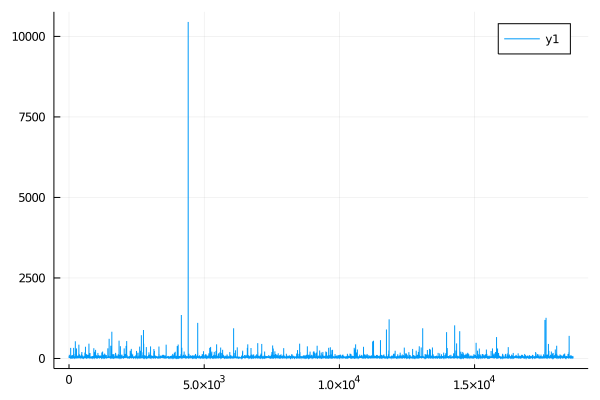

In [18]:
Plots.plot(PCM[!,"disease3_scan | 001 | PanCK"])

In [24]:
skim(PCM)

LoadError: UndefVarError: skim not defined

In [25]:
modePerRegion=[argmax(PCM[!,nn]) for nn in names(PCM)];

In [27]:
Plots.histogram(modePerRegion)

In [10]:
ssGSEA = DataFrame(CSV.File("data/Kidney_ssGSEA.txt"))

1674×232 DataFrame
  Row │ Column1                            DSP.1001250007851.H.A02  DSP.100125 ⋯
      │ String                             Float64                  Float64    ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2-LTR circle formation                          0.341306               ⋯
    2 │ A tetrasaccharide linker sequenc…               0.11526
    3 │ Abacavir metabolism                             0.142778
    4 │ Abacavir transmembrane transport               -0.197259
    5 │ Abacavir transport and metabolism              -0.00453087             ⋯
    6 │ ABC transporter disorders                       0.269915
    7 │ ABC transporters in lipid homeos…              -0.0902464
    8 │ ABC-family proteins mediated tra…               0.193739
    9 │ Abortive elongation of HIV-1 tra…               0.211537               ⋯
   10 │ Acetylcholine binding and downst…              -0.142005
   11 │ Acetylcholine Neurotransmitter R…              -0.0759436
  ⋮   │                 ⋮                             ⋮                        ⋱
 1665 │ WNT mediated activation of DVL                  0.327254
 1666 │ WNT5A-dependent internalization …               0.298216               ⋯
 1667 │ WNT5A-dependent internalization …               0.353903
 1668 │ XBP1(S) activates chaperone genes               0.278942
 1669 │ Xenobiotics                                    -0.0357739
 1670 │ YAP1- and WWTR1 (TAZ)-stimulated…               0.212964               ⋯
 1671 │ ZBP1(DAI) mediated induction of …               0.228587
 1672 │ Zinc efflux and compartmentaliza…               0.0198401
 1673 │ Zinc influx into cells by the SL…               0.0875672
 1674 │ Zinc transporters                               0.0612743              ⋯
                                               230 columns and 1653 rows omitted

In [11]:
names(ssGSEA)

232-element Vector{String}:
 "Column1"
 "DSP.1001250007851.H.A02"
 "DSP.1001250007851.H.A03"
 "DSP.1001250007851.H.A04"
 "DSP.1001250007851.H.A05"
 "DSP.1001250007851.H.A06"
 "DSP.1001250007851.H.A07"
 "DSP.1001250007851.H.A08"
 "DSP.1001250007851.H.A09"
 "DSP.1001250007851.H.A10"
 "DSP.1001250007851.H.A11"
 "DSP.1001250007851.H.A12"
 "DSP.1001250007851.H.B01"
 ⋮
 "DSP.1002510007866.C.G12"
 "DSP.1002510007866.C.H01"
 "DSP.1002510007866.C.H03"
 "DSP.1002510007866.C.H04"
 "DSP.1002510007866.C.H05"
 "DSP.1002510007866.C.H06"
 "DSP.1002510007866.C.H07"
 "DSP.1002510007866.C.H08"
 "DSP.1002510007866.C.H09"
 "DSP.1002510007866.C.H10"
 "DSP.1002510007866.C.H11"
 "DSP.1002510007866.C.H12"

In [18]:
groupPerRegion=[ssGSEA[argmax(ssGSEA[!,nn]),"Column1"] for nn in names(ssGSEA)];

In [19]:
groupPerRegion

232-element Vector{String}:
 "truncated APC mutants destabilize the destruction complex"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "Formation of ATP by chemiosmotic coupling"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "SUMO is conjugated to E1 (UBA2:SAE1)"
 "NOSTRIN mediated eNOS trafficking"
 "Noncanonical activation of NOTCH3"
 "Translation initiation complex formation"
 "Defective LFNG causes SCDO3"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 "LRR FLII-interacting protein 1 (LRRFIP1) activates type I IFN production"
 ⋮
 "SUMO is conjugated to E1 (UBA2:SAE1)"
 "Formation of ATP by chemiosmotic coupling"
 "Formation of ATP by chemiosmotic coupling"
 "Formation of ATP by chemiosmotic coupling"
 "Formation of ATP by chemiosmotic coupling

In [23]:
s=unique(groupPerRegion);

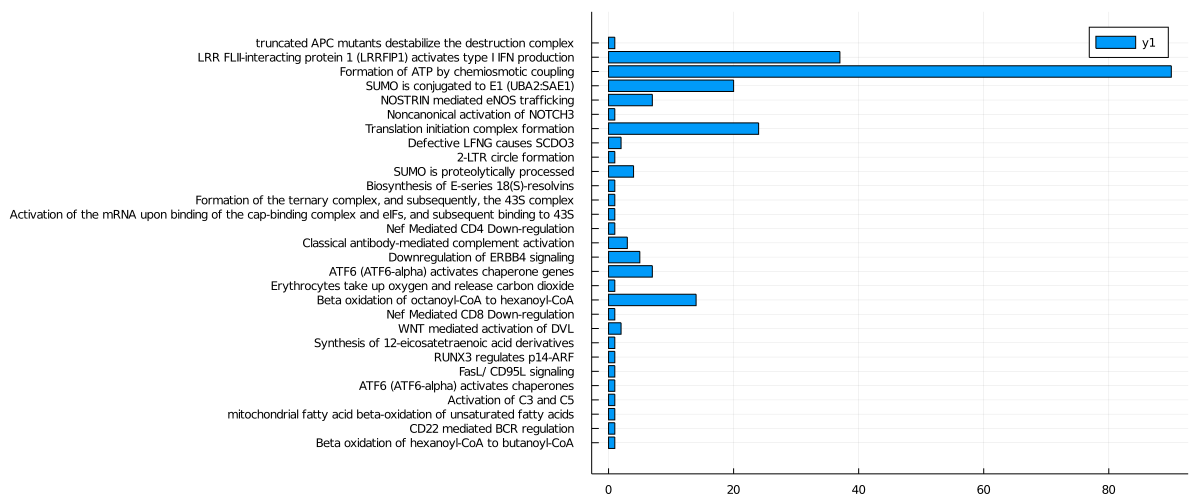

In [30]:
datamap = countmap(groupPerRegion)
bar((x -> datamap[x]).(s), yticks=(1:length(s), s),orientation = :horizontal,yflip=true,size=(1200,500))

In [31]:
png("GEA_histogram.png")